In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


In [2]:
train_seg = '../input/intel-image-classification/seg_train/seg_train/'
test_seg = '../input/intel-image-classification/seg_test/seg_test/'
pred_seg = '../input/intel-image-classification/seg_pred/seg_pred/'

In [3]:
for folder in  os.listdir(train_seg) : 
    files = gb.glob(pathname= str( train_seg + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2382 in folder street
For training data , found 2512 in folder mountain
For training data , found 2404 in folder glacier
For training data , found 2274 in folder sea
For training data , found 2271 in folder forest


In [4]:
for folder in  os.listdir(test_seg) : 
    files = gb.glob(pathname= str( test_seg + folder + '/*.jpg'))
    print(f'For validation data , found {len(files)} in folder {folder}')

For validation data , found 437 in folder buildings
For validation data , found 501 in folder street
For validation data , found 525 in folder mountain
For validation data , found 553 in folder glacier
For validation data , found 510 in folder sea
For validation data , found 474 in folder forest


In [5]:
files = gb.glob(pathname= str( pred_seg + '/*.jpg'))
print(f'For testing data , found {len(files)}')

For testing data , found 7301


In [6]:
#dictionary to maintain the classes
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

#function to get images to plot
def images(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [7]:
#finding out different sizes of the images in train folder
size = []
for folder in  os.listdir(train_seg) : 
    files = gb.glob(pathname= str( train_seg + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [8]:
#finding out different sizes of the images in test folder
size = []
for folder in  os.listdir(test_seg) : 
    files = gb.glob(pathname= str(test_seg + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [9]:
#finding out different sizes of the images in pred folder
size = []
files = gb.glob(pathname= str( pred_seg + '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [10]:
# variable s is the size to which we want to resize our images
s = 100

In [11]:
#read all pictues in six categories in training folder, and use OpenCV to resize it, assign labels to y
train_x = []
train_y = []
for folder in  os.listdir(train_seg) : 
    files = gb.glob(pathname= str(train_seg + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        train_x.append(list(image_array))
        train_y.append(code[folder])

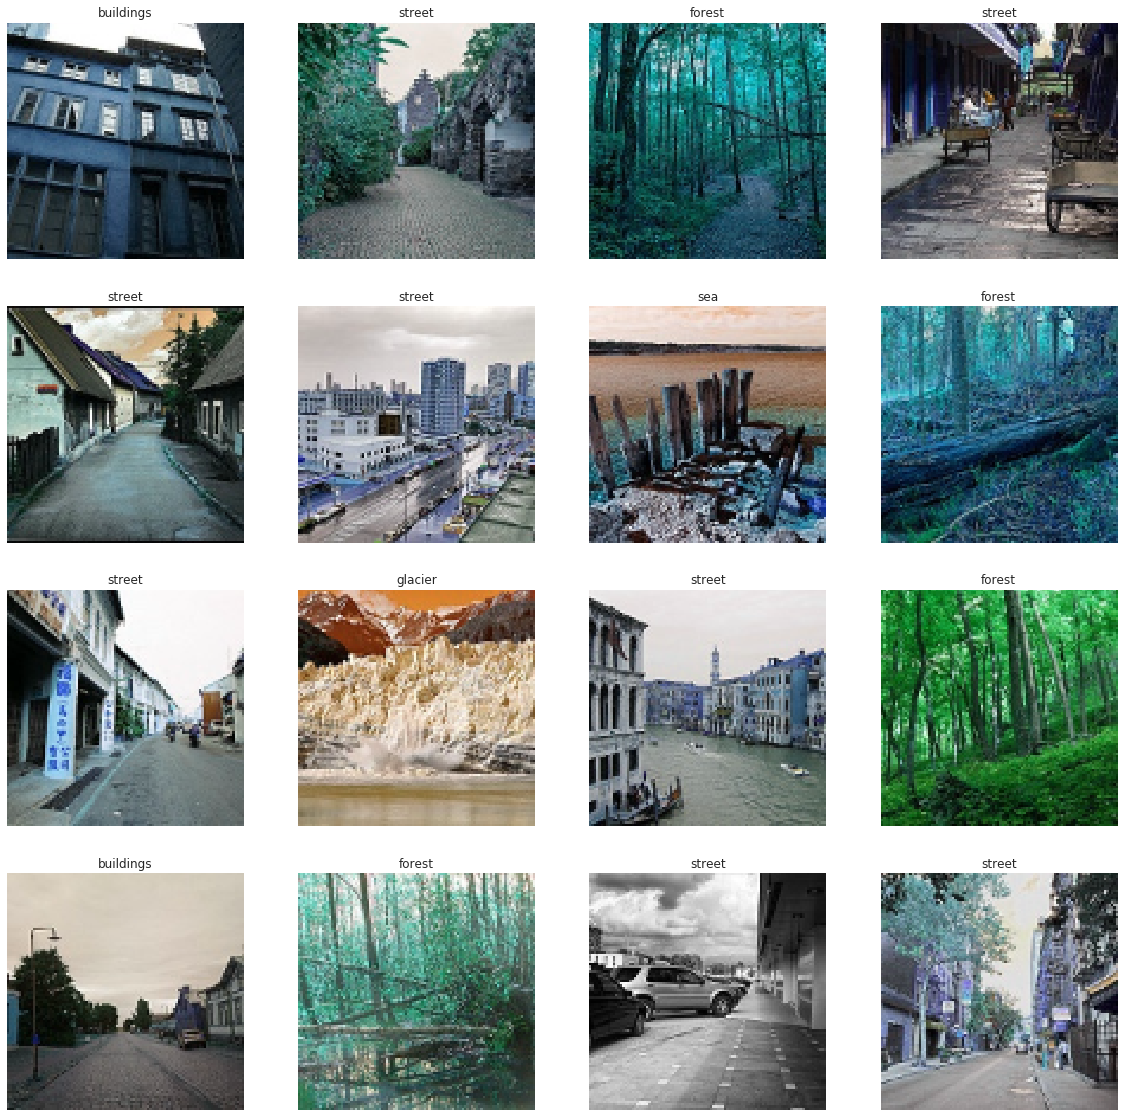

In [12]:
#plot train images
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_x),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(train_x[i])   
    plt.axis('off')
    plt.title(images(train_y[i]))

In [13]:
#read all pictues in six categories in testing folder, and use OpenCV to resize it, assign labels to y
test_x = []
test_y = []
for folder in  os.listdir(test_seg) : 
    files = gb.glob(pathname= str(test_seg + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        test_x.append(list(image_array))
        test_y.append(code[folder])

In [14]:
#read all pictues in pred folder, and use OpenCV to resize it
pred_x = []
files = gb.glob(pathname= str(pred_seg + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    pred_x.append(list(image_array))     

When you read in digital images using the library, they are represented as Numpy arrays. The rectangular shape of the array corresponds to the shape of the image.
With Numpy you can make fast operations on numerical arrays, no matter which dimension, shape, etc.

Image processing libraries (OpenCV, PIL, scikit-image) sometimes wrap images in some special format that already uses Numpy behind the scenes. If they are not already using Numpy in the background, the images can be converted to Numpy arrays explicitly. Then you can do speedy numerical calculations on them (convolution, FFT, blurry, filters, ...).


In [15]:
#convert the data into arrays using numpy
train_x = np.array(train_x)
test_x = np.array(test_x)
X_pred_array = np.array(pred_x)
train_y = np.array(train_y)
test_y = np.array(test_y)

print(f'train_x shape  is {train_x.shape}')
print(f'test_x shape  is {test_x.shape}')
print(f'pred_x shape  is {X_pred_array.shape}')
print(f'train_y shape  is {train_y.shape}')
print(f'test_y shape  is {test_y.shape}')

train_x shape  is (14034, 100, 100, 3)
test_x shape  is (3000, 100, 100, 3)
pred_x shape  is (7301, 100, 100, 3)
train_y shape  is (14034,)
test_y shape  is (3000,)


In [16]:
#building model
model = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])



In [17]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)         

In [19]:
epochs = 20
ThisModel = model.fit(train_x,train_y, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/20
14034/14034 [==============================] - 31s 2ms/step - loss: 1.6125 - accuracy: 0.3699
Epoch 2/20
14034/14034 [==============================] - 25s 2ms/step - loss: 1.1528 - accuracy: 0.5294
Epoch 3/20
14034/14034 [==============================] - 25s 2ms/step - loss: 1.0248 - accuracy: 0.5871
Epoch 4/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.9276 - accuracy: 0.6369
Epoch 5/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.8716 - accuracy: 0.6702
Epoch 6/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.8161 - accuracy: 0.7046
Epoch 7/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.7602 - accuracy: 0.7307
Epoch 8/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6875 - accuracy: 0.7594
Epoch 9/20
14034/14034 [==============================] - 25s 2ms/step - loss: 0.6444 - accuracy: 0.7799
Epoch 10/20
14034/14034 [==============================

In [20]:
ModelLoss, ModelAccuracy = model.evaluate(test_x,test_y)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3000/3000 [==============================] - 2s 798us/step
Test Loss is 0.6600680381457011
Test Accuracy is 0.824999988079071


In [21]:
y_pred = model.predict(test_x)

In [22]:
y_result = model.predict(X_pred_array)

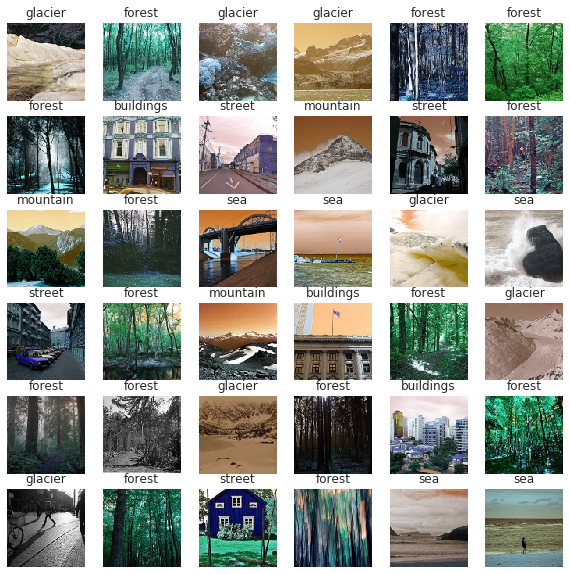

In [23]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(pred_x),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_x[i])    
    plt.axis('off')
    plt.title(images(np.argmax(y_result[i])))